# Neural Art

Some experiments with neural network art.

In [1]:
%load_ext watermark
%watermark -a '' -u -d -v -p numpy,matplotlib,theano,keras

%matplotlib inline

Using Theano backend.


last updated: 2016-10-11 

CPython 3.5.2
IPython 4.2.0

numpy 1.11.1
matplotlib 1.5.1
theano 0.8.2
keras 1.1.0


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

# dims: an array of number of nodes for all layers
def sequential_dense_network(dims, init='lecun_uniform'):
    model = Sequential()
    
    for index in range(len(dims)-1):
        input_dim = dims[index]
        output_dim = dims[index+1]
        
        if index < len(dims)-2:
            activation = 'tanh'
        else:
            activation = 'sigmoid'
        
        layer = Dense(input_dim = input_dim,
                      output_dim = output_dim,
                      init = init,
                      activation = activation)
        model.add(layer)
        
    return model

In [3]:
import numpy as np
from keras import initializations

def unit_uniform(shape, name=None):
    #return np.random.uniform(size = shape)
    return initializations.uniform(shape, scale=1.0, name=name)

In [4]:
import numpy as np

np.random.seed(13) 

weight_init = 'lecun_uniform'
weight_init = unit_uniform

num_coords = 2
num_colors = 3
num_hidden_nodes = 16
num_hidden_layers = 8

hidden_dims = [num_hidden_nodes for k in range(num_hidden_layers)]

# need bias for input as well
dims = [num_coords + 1] +  hidden_dims + [num_colors]

model = sequential_dense_network(dims, init = weight_init)

model.compile(loss = "mean_squared_error", optimizer = 'sgd', metrics = ["accuracy"])


In [5]:
width = 64
height = width

x_coords, y_coords = np.meshgrid(np.linspace(0, 1, width)-0.5, np.linspace(0, 1, height)-0.5)
print('x range: [%f, %f]' % (np.min(x_coords), np.max(x_coords)))
print('y range: [%f, %f]' % (np.min(y_coords), np.max(y_coords)))

input_coords = np.array([x_coords.ravel(), y_coords.ravel(), np.ones(height*width)]).transpose()

output_colors = model.predict(input_coords)

output_image = output_colors.reshape(height, width, num_colors)

#print(input_coords.shape)
#print(output_colors.shape)
# print(output_image.shape)
print('output range: [%f, %f]' % (np.min(output_image), np.max(output_image)))

x range: [-0.500000, 0.500000]
y range: [-0.500000, 0.500000]
output range: [0.003662, 0.992965]


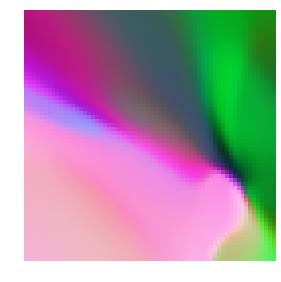

In [6]:
import matplotlib.pyplot as plt

plt.imshow(output_image, interpolation='nearest')
plt.axis('off')
plt.tight_layout()
plt.show()